In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 

In [2]:
data = tf.keras.datasets.mnist # Hand Written Digits Data
(x_train,y_train) , (x_test,y_test) = data.load_data() # Split data
x_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(60000, 28, 28)

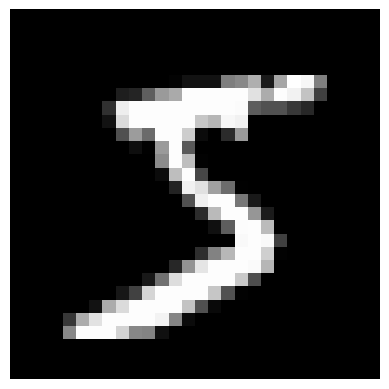

5


In [3]:
image = x_train[0]  # image in first index

# Show image
plt.imshow(image, cmap='gray')  # 'gray' for black-white image
plt.axis('off')  # Hiding axes
plt.show()
print(y_train[0]) 

In [4]:
# We normalized the data to the range of 0 to 1.
x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1) 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense


model = Sequential([
    Flatten(input_shape=(28,28)), # input layer , 28x28 image converted to 1D 
    Dense(128,activation='relu'), #  layer has 128 neuron
    Dense(128,activation='relu'),
    Dense(10,activation='softmax') # output layer
])


c:\Users\FURKAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8645 - loss: 0.4853
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9658 - loss: 0.1125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9772 - loss: 0.0727
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9825 - loss: 0.0523
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0358
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0285
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9925 - loss: 0.0231
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0183
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9946 - loss: 0.0158
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9964 - loss: 0.0111


In [8]:
loss , accuracy = model.evaluate(x_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.1405
Loss:0.1185690313577652
Accuracy:0.9743000268936157


In [9]:
def predict_digits(model):
    image_number = 0
    path = "digits/digit"
    true_pre = 0
    while os.path.isfile(f"{path}{image_number}.png"):
        try:
            current_path = f"{path}{image_number}.png"
            
            # 1. Read original image
            image = cv2.imread(current_path, cv2.IMREAD_GRAYSCALE)
            plt.imshow(image, cmap='gray')
            plt.axis('off')
            plt.show()
            
            # 2. Simple thresholding
            _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
        
            # 3. Ensure digits are black on white background
            if np.mean(image) > 127:  # if background is light
                image = cv2.bitwise_not(image)
            
            # 4. Normalize to [0, 1]
            image = image.astype('float32') / 255.0
            
            # 5. Resize to 28x28
            image = cv2.resize(image, (28, 28))
            
            # Reshape for model input
            model_input = image.reshape(1, 28, 28, 1)
            
            # Make prediction
            prediction = model.predict(model_input)
            predicted_digit = np.argmax(prediction)
            confidence = prediction[0][predicted_digit] * 100

            if(predicted_digit==image_number):
                true_pre += 1
            
            print(f"Predicted digit: {predicted_digit}")
            print(f"Confidence: {confidence:.2f}%")
            print(f"Full probabilities: {prediction[0]}\n")
            
        except Exception as e:
            print(f"Error processing image {current_path}: {e}")
        finally:
            image_number += 1
    print(f"Accuracy : {true_pre}/10")        
        

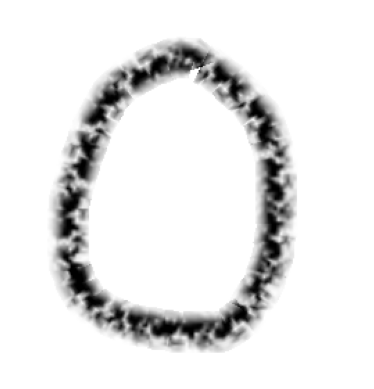

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted digit: 0
Confidence: 100.00%
Full probabilities: [9.99985099e-01 2.91644531e-09 1.00010375e-05 5.04739095e-09
 5.54453872e-10 3.46335138e-09 6.72288907e-15 4.79433720e-06
 1.90274263e-14 8.15408114e-08]



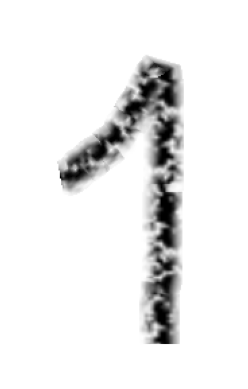

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted digit: 7
Confidence: 79.92%
Full probabilities: [3.4327977e-10 3.5394201e-08 2.0080926e-01 1.2979537e-08 1.2234533e-10
 1.8373129e-06 5.8173627e-14 7.9918885e-01 7.5328049e-11 4.9326470e-08]



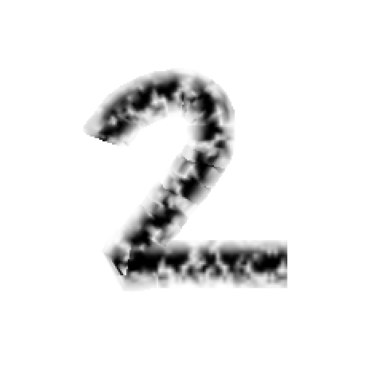

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted digit: 7
Confidence: 86.71%
Full probabilities: [4.0146787e-19 1.0866656e-07 1.3282174e-01 6.3222702e-05 3.1137016e-16
 4.6886505e-12 5.2127828e-22 8.6711484e-01 1.7401889e-18 3.5322578e-17]



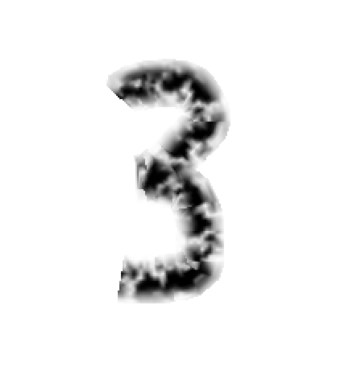

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digit: 3
Confidence: 100.00%
Full probabilities: [5.4624645e-28 9.7124676e-08 1.4854640e-11 9.9999988e-01 4.9986794e-13
 3.3522965e-20 2.3681177e-29 2.6682885e-08 2.1304634e-16 6.9972747e-18]



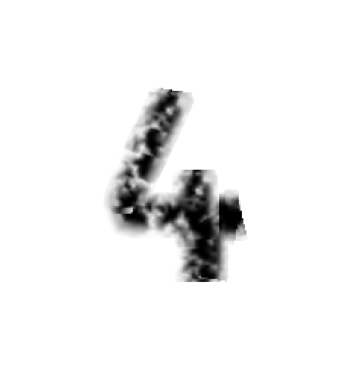

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 4
Confidence: 100.00%
Full probabilities: [2.7857034e-33 2.1708065e-19 1.0408777e-18 2.2695914e-29 1.0000000e+00
 8.0474259e-26 2.8789547e-21 1.2353764e-16 1.5168139e-28 4.5961419e-11]



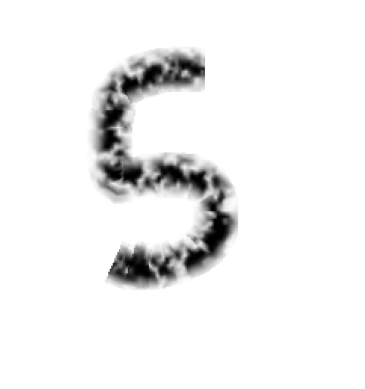

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 3
Confidence: 97.60%
Full probabilities: [8.8219423e-12 6.1193186e-06 7.7365508e-04 9.7596163e-01 6.3743362e-05
 1.6770100e-06 1.5388512e-11 2.3193063e-02 1.6050964e-09 2.0396065e-08]



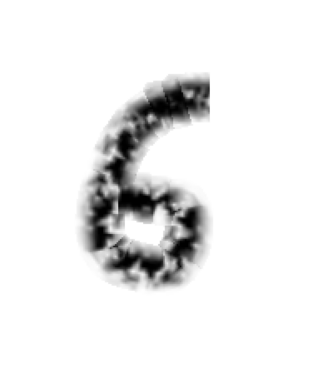

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 9
Confidence: 100.00%
Full probabilities: [4.6539552e-12 1.1963323e-22 2.7831794e-11 6.2562274e-20 1.4191265e-09
 2.5664791e-08 8.6993126e-08 3.2668132e-15 5.2603361e-10 9.9999988e-01]



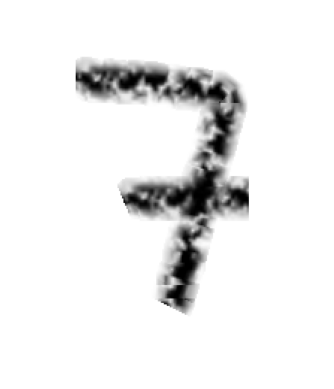

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted digit: 7
Confidence: 100.00%
Full probabilities: [1.9998681e-29 1.9585244e-15 3.2214810e-08 3.0595649e-07 2.9725283e-14
 4.1811314e-26 1.3333298e-34 9.9999964e-01 2.4164318e-18 5.4265389e-14]



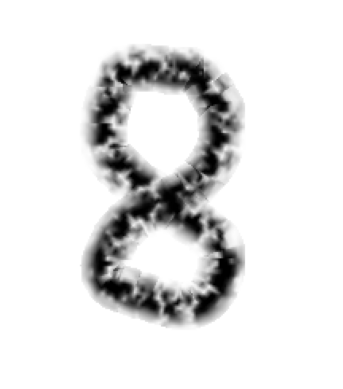

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted digit: 8
Confidence: 100.00%
Full probabilities: [4.65089721e-22 5.24660226e-24 1.07762835e-11 3.37581074e-10
 1.15392206e-13 7.30175850e-19 1.25235099e-28 1.43186308e-19
 1.00000000e+00 3.85009529e-17]



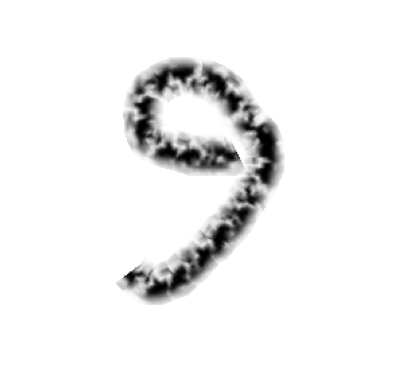

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted digit: 7
Confidence: 57.83%
Full probabilities: [6.4679831e-08 3.8262848e-02 1.0762068e-06 5.8079441e-03 7.3516890e-07
 4.5180326e-12 1.9716591e-17 5.7832599e-01 1.1670967e-06 3.7760016e-01]

Accuracy : 5/10


In [10]:
predict_digits(model)

In [11]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D

model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # 2D giriş (örneğin, 28x28 tek kanallı görüntü)
    MaxPooling2D(pool_size=(2,2)),  # Havuzlama katmanı
    Flatten(),  # 2D -> 1D dönüşümü
    Dense(128, activation='relu'),  # Tam bağlantılı katman
    Dense(10, activation='softmax')  # Çıkış katmanı (10 sınıflı)
])

c:\Users\FURKAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8912 - loss: 0.3709
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9777 - loss: 0.0736
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9869 - loss: 0.0444
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9909 - loss: 0.0308
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9931 - loss: 0.0223
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9954 - loss: 0.0144
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9964 - loss: 0.0112
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9972 - loss: 0.0085
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9982 - loss: 0.0057
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9981 - loss: 0.0056


In [14]:
loss , accuracy = model2.evaluate(x_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0917
Loss:0.07432287931442261
Accuracy:0.9828000068664551


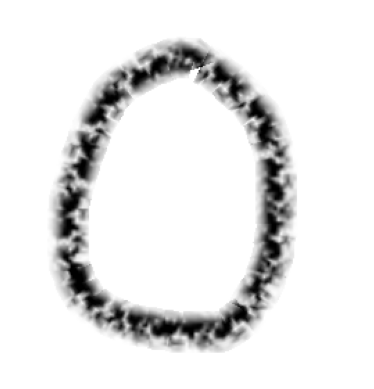

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted digit: 0
Confidence: 100.00%
Full probabilities: [1.0000000e+00 2.4622190e-21 6.5858952e-10 1.3183161e-16 0.0000000e+00
 1.2474806e-09 1.4248855e-23 2.4749186e-24 1.3153663e-18 8.7449370e-10]



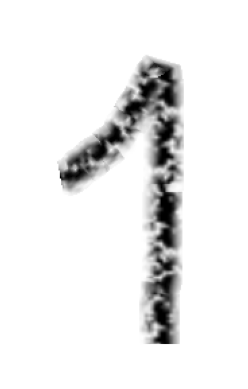

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 7
Confidence: 100.00%
Full probabilities: [9.3684566e-27 3.5903675e-17 1.3107820e-12 3.4675233e-19 4.8711830e-21
 1.0703962e-20 1.6057529e-34 1.0000000e+00 1.9313716e-10 4.7596783e-24]



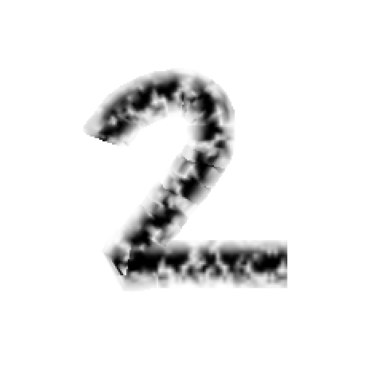

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 9
Confidence: 58.74%
Full probabilities: [1.27827111e-12 3.87345815e-11 4.12573814e-01 5.49543809e-13
 1.60597100e-08 1.04742805e-23 4.90879685e-19 2.58524539e-11
 5.21356265e-18 5.87426186e-01]



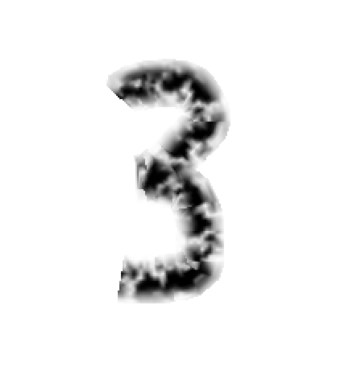

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted digit: 3
Confidence: 100.00%
Full probabilities: [1.9306015e-23 1.3848130e-09 7.6645335e-07 9.9996042e-01 5.3932984e-21
 2.9290750e-11 3.9286974e-22 4.3745723e-13 3.8841859e-05 1.1757492e-08]



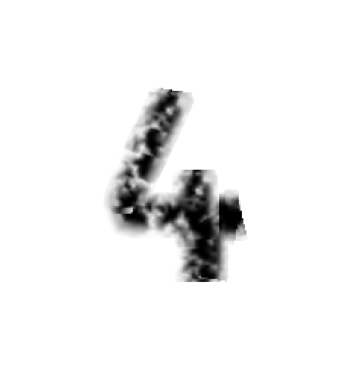

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted digit: 6
Confidence: 76.87%
Full probabilities: [2.5016793e-20 6.9796293e-16 1.2328804e-12 1.4948589e-27 2.3134412e-01
 4.0874996e-19 7.6865590e-01 9.6538697e-25 1.3515565e-16 1.6197295e-11]



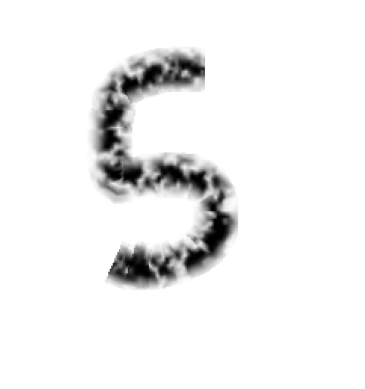

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted digit: 9
Confidence: 57.88%
Full probabilities: [1.8038805e-11 1.8209262e-11 1.1257389e-01 2.1386346e-01 3.0317160e-06
 9.4656162e-02 1.0378292e-04 4.8754134e-07 4.8106489e-08 5.7879919e-01]



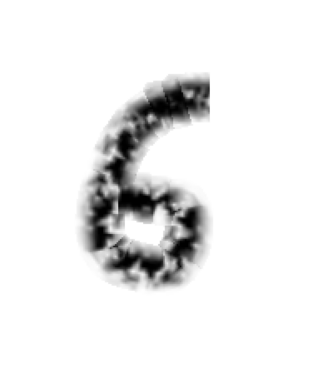

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 9
Confidence: 100.00%
Full probabilities: [4.1737783e-11 1.1272023e-28 5.3853338e-08 1.2921388e-25 1.4252790e-05
 2.9494724e-05 6.4552887e-09 2.4109710e-23 5.3261065e-08 9.9995613e-01]



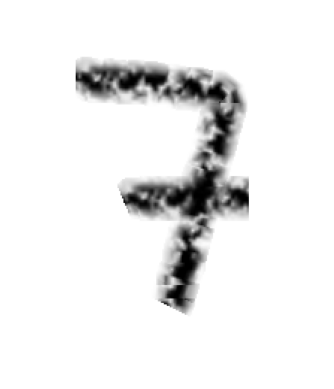

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted digit: 7
Confidence: 99.79%
Full probabilities: [3.6579700e-27 1.4254119e-12 1.2772976e-03 8.6748194e-08 4.5512913e-11
 7.5001743e-19 1.5320352e-34 9.9787498e-01 8.4766309e-04 2.7037444e-08]



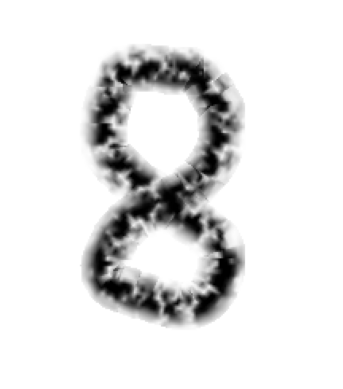

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: 8
Confidence: 100.00%
Full probabilities: [0.0000000e+00 0.0000000e+00 1.6831176e-25 1.3815786e-23 1.7594146e-35
 6.1434369e-37 0.0000000e+00 0.0000000e+00 1.0000000e+00 4.7521127e-24]



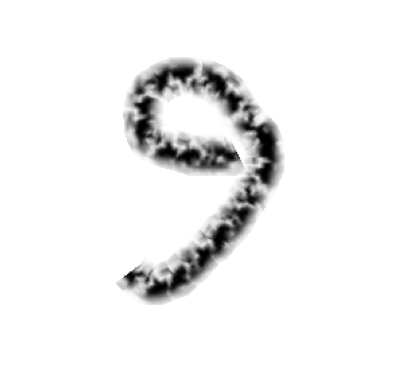

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted digit: 9
Confidence: 100.00%
Full probabilities: [2.0399756e-12 1.3038419e-24 5.6585154e-08 1.2820797e-19 1.8853078e-21
 3.5267660e-27 1.8894879e-32 4.2104267e-09 2.6773222e-08 9.9999988e-01]

Accuracy : 5/10


In [15]:
predict_digits(model2)
        

In [16]:
from tensorflow.keras.layers import Dropout
model3 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  
    MaxPooling2D(pool_size=(2,2)),  
    Conv2D(64, (3,3), activation='relu'),  
    MaxPooling2D(pool_size=(2,2)),  
    Conv2D(128, (3,3), activation='relu'),  
    MaxPooling2D(pool_size=(2,2)),  
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Aşırı öğrenmeyi önler
    Dense(10, activation='softmax')
])


In [17]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model3.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7935 - loss: 0.6236 - val_accuracy: 0.9750 - val_loss: 0.0821
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9697 - loss: 0.1055 - val_accuracy: 0.9781 - val_loss: 0.0703
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9785 - loss: 0.0765 - val_accuracy: 0.9804 - val_loss: 0.0700
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9822 - loss: 0.0591 - val_accuracy: 0.9842 - val_loss: 0.0549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9870 - loss: 0.0437 - val_accuracy: 0.9857 - val_loss: 0.0493
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9885 - loss: 0.0378 - val_accuracy: 0.9872 - val_loss: 0.0488
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9879 - val_loss: 0.0420
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9930 - l

In [19]:
loss , accuracy = model3.evaluate(x_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9872 - loss: 0.0666
Loss:0.05339491739869118
Accuracy:0.9887999892234802


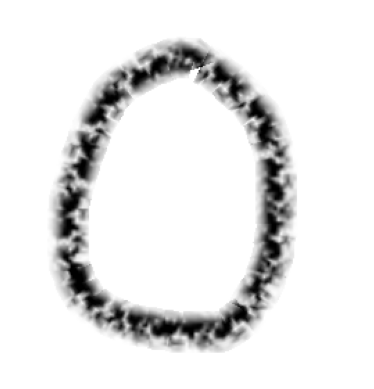

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted digit: 0
Confidence: 100.00%
Full probabilities: [9.9999988e-01 1.7280138e-18 9.2864405e-12 1.9506277e-16 2.5397353e-12
 2.1387306e-10 1.1310261e-07 1.6639733e-16 1.4836439e-14 1.2498708e-10]



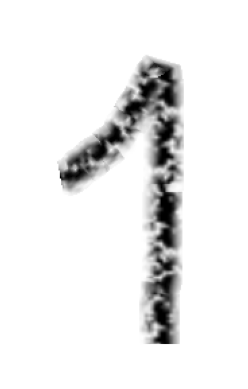

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 3
Confidence: 58.43%
Full probabilities: [5.0574607e-11 2.6457716e-02 1.6370413e-04 5.8429998e-01 4.3164385e-07
 3.8759410e-03 1.7104861e-10 3.8519669e-01 5.4448014e-06 3.3257702e-08]



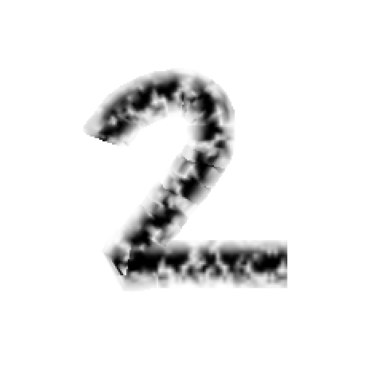

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 2
Confidence: 100.00%
Full probabilities: [2.4458293e-19 1.8539490e-21 1.0000000e+00 5.4438824e-15 3.8689418e-16
 7.4299051e-21 1.2527174e-15 2.4594290e-15 2.1014519e-18 4.9840087e-17]



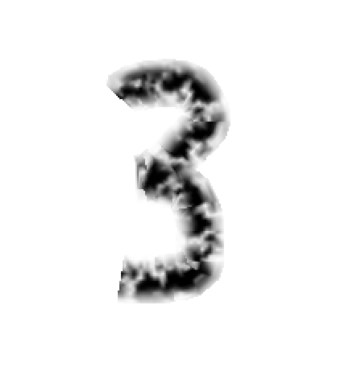

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 3
Confidence: 100.00%
Full probabilities: [4.7502890e-21 2.1962668e-14 1.0674555e-14 1.0000000e+00 1.5042615e-23
 4.7504606e-10 2.3803783e-24 1.9375156e-17 1.1947394e-13 4.3360642e-18]



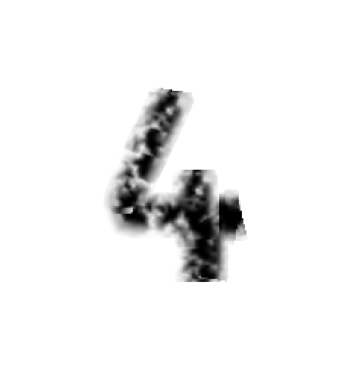

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted digit: 4
Confidence: 100.00%
Full probabilities: [5.8376954e-22 1.0805017e-18 3.0815624e-19 1.1797320e-22 1.0000000e+00
 1.2035122e-18 6.1255532e-12 1.8531542e-17 1.8123063e-16 1.9928710e-09]



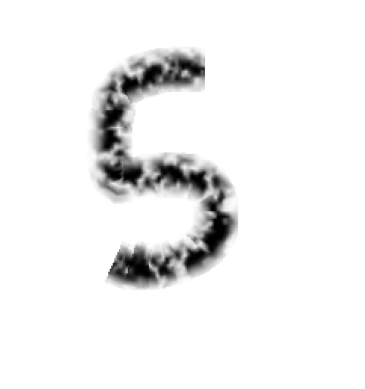

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted digit: 5
Confidence: 100.00%
Full probabilities: [4.4336639e-17 6.9659397e-15 3.7174182e-17 1.1622894e-13 8.9272509e-14
 1.0000000e+00 5.7791072e-12 8.1709718e-19 5.4735847e-12 3.5476591e-13]



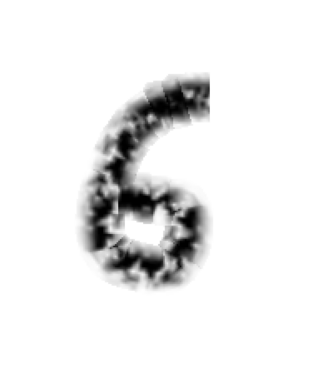

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 5
Confidence: 99.99%
Full probabilities: [2.3566288e-11 5.4416547e-15 1.0308307e-13 6.1086112e-14 1.3447211e-09
 9.9994171e-01 9.4029104e-11 1.3575334e-10 3.7870413e-09 5.8270256e-05]



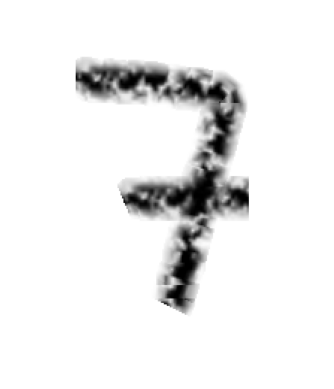

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 7
Confidence: 100.00%
Full probabilities: [8.22956449e-18 7.98236477e-10 3.41659501e-09 1.64103994e-07
 4.19859937e-12 9.12023346e-14 3.06350884e-21 9.99999881e-01
 3.19530508e-14 1.23460435e-11]



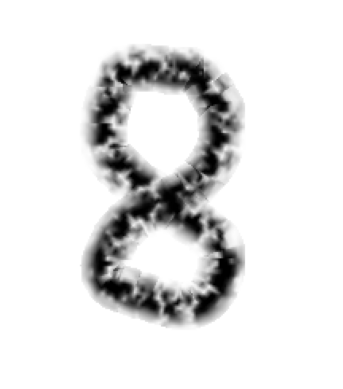

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 8
Confidence: 100.00%
Full probabilities: [0.0000000e+00 0.0000000e+00 9.2862552e-29 8.6478498e-30 0.0000000e+00
 2.5101489e-37 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]



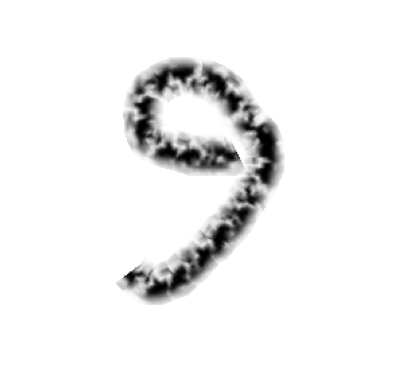

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted digit: 9
Confidence: 100.00%
Full probabilities: [9.4550561e-14 1.1169827e-16 4.0504176e-16 7.4568842e-15 2.3423975e-11
 1.0750292e-14 6.2393819e-22 2.4239519e-06 4.2393684e-14 9.9999762e-01]

Accuracy : 8/10


In [20]:
predict_digits(model3)

In [26]:
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D

model4 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),  
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),  
    MaxPooling2D(pool_size=(2,2)),  
    Dropout(0.25),  

    Conv2D(64, (3,3), activation='relu', padding='same'),  
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', dilation_rate=2, padding='same'),  # Dilated Conv
    MaxPooling2D(pool_size=(2,2)),  
    Dropout(0.3),  

    Conv2D(128, (3,3), activation='relu', padding='same'),  
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', dilation_rate=2, padding='same'),  
    MaxPooling2D(pool_size=(2,2)),  
    Dropout(0.4),  

    GlobalAveragePooling2D(),  
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])



In [22]:
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model4.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 34ms/step - accuracy: 0.8160 - loss: 0.5599 - val_accuracy: 0.9831 - val_loss: 0.0568
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9757 - loss: 0.0876 - val_accuracy: 0.9865 - val_loss: 0.0444
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9821 - loss: 0.0638 - val_accuracy: 0.9880 - val_loss: 0.0441
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9853 - loss: 0.0540 - val_accuracy: 0.9903 - val_loss: 0.0298
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9879 - loss: 0.0429 - val_accuracy: 0.9917 - val_loss: 0.0304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9893 - loss: 0.0395 - val_accuracy: 0.9920 - val_loss: 0.0303
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9899 - loss: 0.0356 - val_accuracy: 0.9942 - val_loss: 0.0243
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9913 -

In [24]:
loss , accuracy = model4.evaluate(x_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9887 - loss: 0.0479
Loss:0.03717917948961258
Accuracy:0.9919000267982483


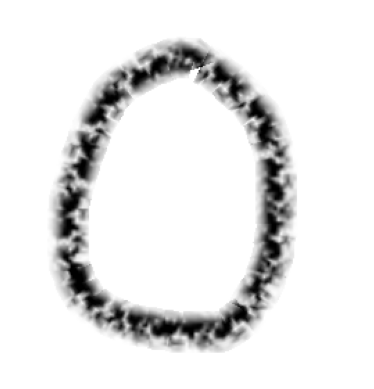

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted digit: 0
Confidence: 97.80%
Full probabilities: [9.7804070e-01 1.7910622e-04 8.6728507e-04 7.5385533e-04 8.8326714e-04
 2.0367648e-03 6.2978589e-03 4.9307058e-04 3.0946380e-03 7.3533789e-03]



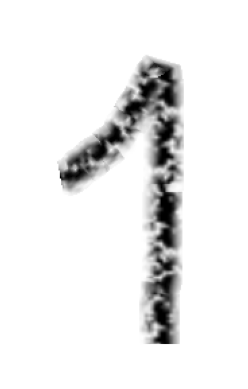

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 7
Confidence: 99.24%
Full probabilities: [9.2247866e-08 6.0340362e-03 3.7756612e-04 7.4211915e-04 1.1827506e-04
 9.4455150e-05 2.4789600e-07 9.9241382e-01 6.0358279e-06 2.1340227e-04]



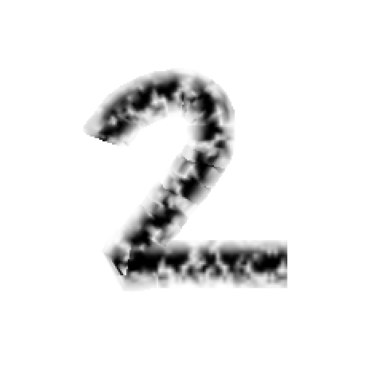

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted digit: 2
Confidence: 100.00%
Full probabilities: [2.7220433e-19 4.0582839e-16 1.0000000e+00 2.6665642e-12 3.3962033e-19
 6.0591724e-18 3.7962078e-17 2.4460622e-12 7.8438258e-15 1.8879800e-19]



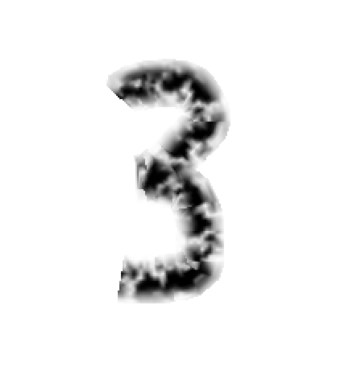

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 3
Confidence: 100.00%
Full probabilities: [3.4992755e-30 4.9994614e-21 8.8401003e-23 1.0000000e+00 7.8975323e-32
 1.0792590e-08 2.5867310e-28 5.6693901e-21 2.4562076e-19 2.1968960e-21]



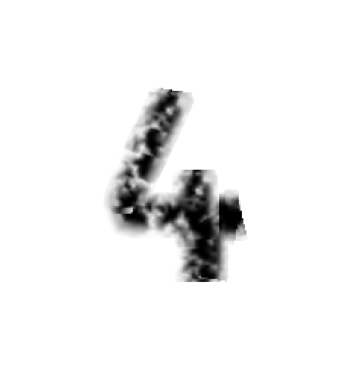

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted digit: 5
Confidence: 97.61%
Full probabilities: [3.4976809e-05 1.2984323e-04 5.1312702e-05 1.6763151e-02 9.0022266e-05
 9.7612530e-01 3.3602901e-03 9.3080715e-05 2.5012470e-03 8.5075031e-04]



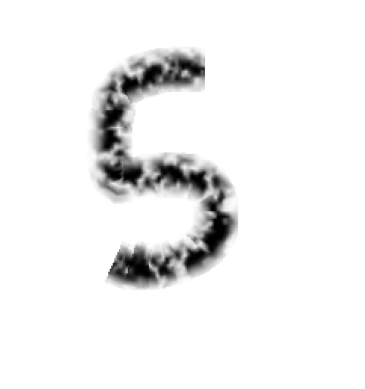

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: 5
Confidence: 100.00%
Full probabilities: [4.8489301e-23 4.8776764e-27 3.0809049e-26 1.3814336e-12 6.8074444e-26
 1.0000000e+00 2.9805071e-17 1.5063058e-23 1.6427760e-15 2.7001109e-17]



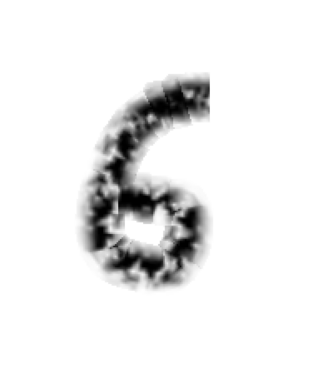

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: 5
Confidence: 100.00%
Full probabilities: [3.0391076e-13 6.3631279e-17 2.8556318e-16 1.3873854e-08 8.9828776e-15
 1.0000000e+00 9.6082631e-10 6.2319009e-15 8.5310639e-09 3.6113898e-10]



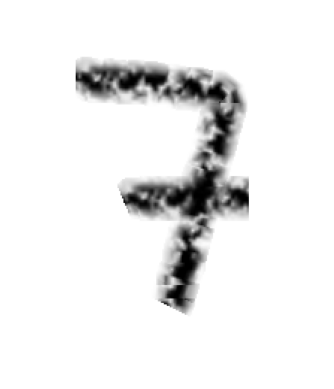

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted digit: 7
Confidence: 100.00%
Full probabilities: [2.54853635e-17 1.64846927e-08 7.05787706e-10 3.56801744e-09
 1.71573158e-10 6.91213892e-11 1.21663139e-17 1.00000000e+00
 1.10843416e-13 2.67326983e-09]



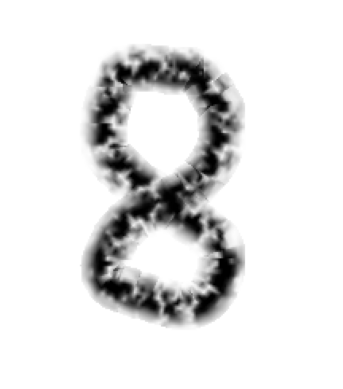

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: 8
Confidence: 100.00%
Full probabilities: [8.6458839e-27 1.0763405e-22 4.7903619e-20 6.7010620e-14 3.0534911e-26
 1.8748841e-17 1.2442351e-23 6.0503774e-24 1.0000000e+00 2.0236312e-18]



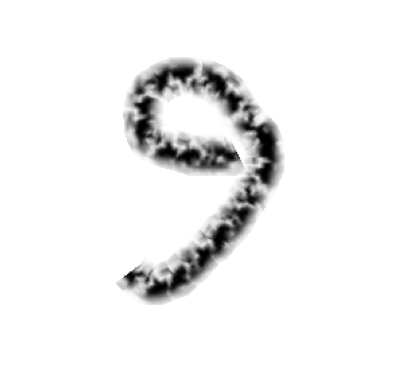

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted digit: 7
Confidence: 68.78%
Full probabilities: [9.2105529e-06 2.5674353e-07 9.5381969e-05 1.9073371e-02 1.3590952e-05
 5.6373496e-02 1.6160314e-08 6.8775141e-01 4.8553757e-04 2.3619768e-01]

Accuracy : 6/10


In [25]:
predict_digits(model4)